In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, LSTM, GRU
import numpy as np


2024-07-22 09:26:04.939038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Para leer datos lo mejor es usar la toolbox pandas

Los datos se han sacado de:
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3

In [2]:
import pandas as pd

dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
dd_aa = pd.read_csv("aa.us.txt", delimiter=",")
dd_iae = pd.read_csv("iae.us.txt", delimiter=",")


In [3]:
googl_op = dd_googl['Open'].values
aa_op = dd_aa['Open'].values
iae_op = dd_iae['Open'].values

In [4]:
aa = dd_googl['Date'].values
googl_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [5]:
aa = dd_aa['Date'].values
aa_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    aa_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [6]:
aa = dd_iae['Date'].values
iae_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    iae_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

In [7]:
print(googl_indice.shape)
print(googl_op.shape)

(3333,)
(3333,)


In [8]:
indices = set(googl_indice) & set(aa_indice) & set(iae_indice) 

ii = np.in1d(googl_indice,list(indices))
data_googl = googl_op[ii]
ii = np.in1d(aa_indice,list(indices))
data_aa = aa_op[ii]
ii = np.in1d(iae_indice,list(indices))
data_iae = iae_op[ii]

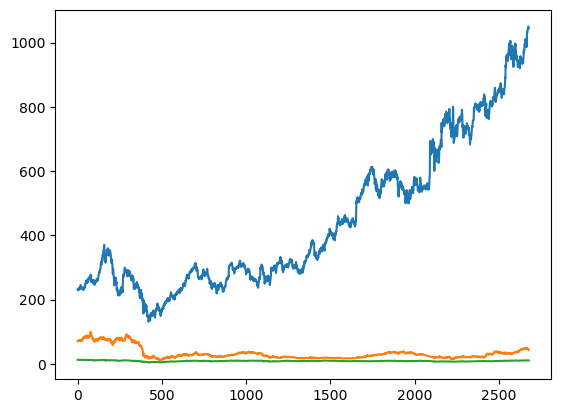

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(data_googl)
plt.plot(data_aa)
plt.plot(data_iae)

In [10]:
DAT = np.zeros((data_googl.shape[0],3))
DAT[:,0] = data_googl
DAT[:,1] = data_aa
DAT[:,2] = data_iae
               

In [11]:
DAT.shape

(2678, 3)

In [12]:
LAG = 15
DAT_TS = np.zeros((DAT.shape[0]-LAG,LAG,DAT.shape[1]))

for ii in range(0,DAT.shape[0]-LAG):
    DAT_TS[ii,:,:] = DAT[ii:ii+LAG,:]
    

In [13]:
DAT_TS.shape

(2663, 15, 3)

In [14]:
Ntr = np.floor(DAT_TS.shape[0]/2)
Y_target = 0

XX_tr = DAT_TS[range(0,int(Ntr)),0:LAG-1,:]
XX_ts = DAT_TS[range(int(Ntr)+1,2*int(Ntr)),0:LAG-1,:]

YY_tr = DAT_TS[range(0,int(Ntr)),LAG-1,Y_target]
YY_ts = DAT_TS[range(int(Ntr)+1,2*int(Ntr)),LAG-1,Y_target]



In [15]:
print(XX_tr.shape)
print(XX_ts.shape)
print(YY_tr.shape)
print(YY_ts.shape)


(1331, 14, 3)
(1330, 14, 3)
(1331,)
(1330,)


## MODEL 1

In [16]:
model = Sequential()
model.add(LSTM(1, input_shape=(XX_tr.shape[1],XX_tr.shape[2],)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 20        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## MODELO 2

In [18]:
model2 = Sequential()
model2.add(LSTM(10, input_shape=(14,3,), return_sequences = True))
model2.add(LSTM(10))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mae')

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 14, 10)            560       
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


## MODELO 3

In [20]:
model3 = Sequential()
model3.add(LSTM(10, input_shape=(XX_tr.shape[1],XX_tr.shape[2],), return_sequences = True))
model3.add(GRU(10))
model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mae')

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 14, 10)            560       
                                                                 
 gru (GRU)                   (None, 10)                660       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.callbacks import History 
history = History()

model3.fit(XX_tr, YY_tr, batch_size=32, epochs=100, verbose=1, callbacks=[history])

Epoch 1/100


42/42 [==============================] - 4s 92ms/step - loss: 247.7104
Epoch 2/100
42/42 [==============================] - 3s 71ms/step - loss: 247.2293
Epoch 3/100
42/42 [==============================] - 2s 53ms/step - loss: 246.7496
Epoch 4/100
42/42 [==============================] - 3s 67ms/step - loss: 246.2711
Epoch 5/100
42/42 [==============================] - 2s 47ms/step - loss: 245.7937
Epoch 6/100
42/42 [==============================] - 2s 44ms/step - loss: 245.3174
Epoch 7/100
42/42 [==============================] - 2s 39ms/step - loss: 244.8420
Epoch 8/100
42/42 [==============================] - 2s 48ms/step - loss: 244.3674
Epoch 9/100
42/42 [==============================] - 2s 41ms/step - loss: 243.8937
Epoch 10/100
42/42 [==============================] - 2s 39ms/step - loss: 243.4206
Epoch 11/100
42/42 [==============================] - 2s 41ms/step - loss: 242.9482
Epoch 12/100
42/42 [==============================] - 2s 43ms/step - loss: 242.4764
Epoch 13/100


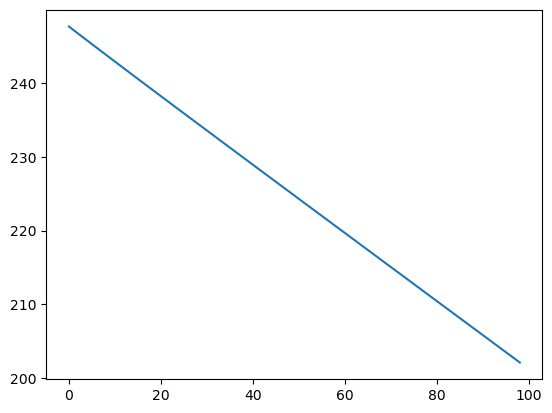

In [27]:
loss_ev = history.history['loss']

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(loss_ev[0:-1])

In [28]:
score = model.evaluate(XX_tr, YY_tr, verbose=0)
score

260.9618835449219

In [29]:
y_hat = model.predict(XX_tr)
np.mean(abs(y_hat[:,0]-YY_tr))

42/42 [==============================] - 1s 6ms/step


260.96188459129286

In [30]:
y_hat.shape

(1331, 1)

## TEST

In [31]:
y_hat = model.predict(XX_ts)
np.mean(abs(y_hat[:,0]-YY_ts))

42/42 [==============================] - 0s 7ms/step


630.9296954887219

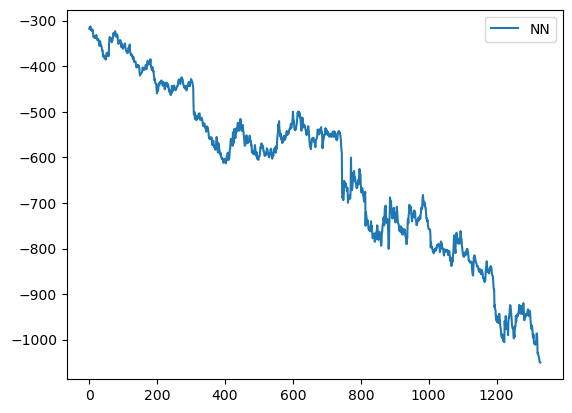

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(y_hat[:,0]-YY_ts, label='NN')
plt.legend()

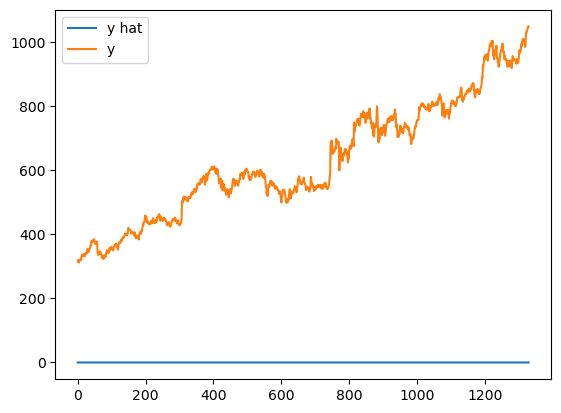

In [33]:
plt.figure()
plt.plot(y_hat[:,0], label='y hat')
plt.plot(YY_ts, label='y')
plt.legend()